In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('yelp.csv')

In [4]:
# check dataframe
df.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [5]:
# check info dan describe dari dataframe
display(df.describe())
display(df.info())

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


None

In [6]:
# check data kosong
df.isnull().sum() 

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

In [7]:
# buat attribute/kolom 'panjang_text' ke dataframe
df['panjang_text'] = df['text'].apply(len)

In [8]:
# check kolom 'panjang_text' (e.g. 10 data pertama)
df['panjang_text'][0:10]

0     889
1    1345
2      76
3     419
4     469
5    2094
6    1565
7     274
8     349
9     186
Name: panjang_text, dtype: int64

In [9]:
# check data 'text' pertama
df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

## Exploratory Data Analysis ##

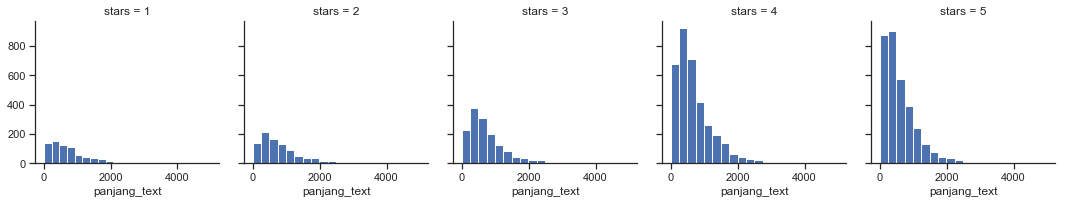

In [10]:
sns.set(style='ticks',color_codes=True)
g = sns.FacetGrid(df, col="stars")
g = g.map(plt.hist, "panjang_text", bins=20)

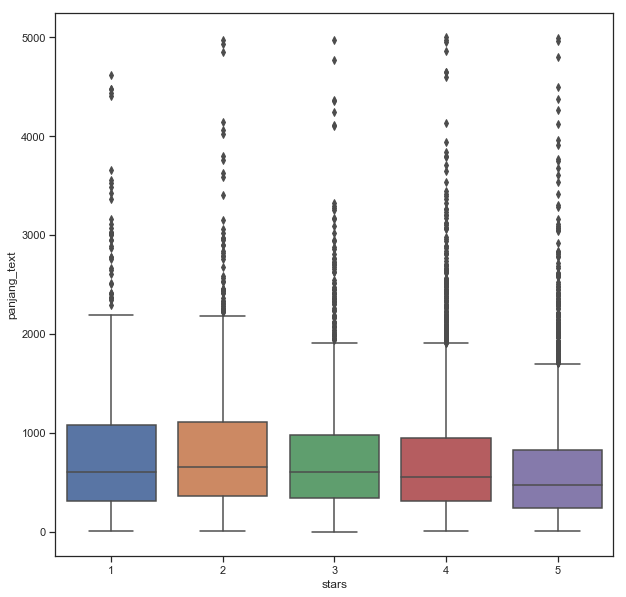

In [11]:
plt.figure(figsize=(10,10))
sns.boxplot(x='stars',y='panjang_text',data=df)

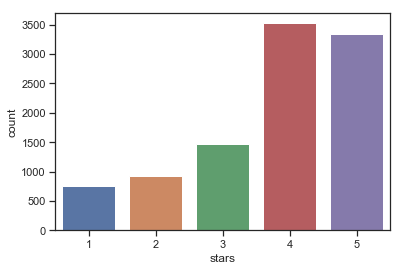

In [12]:
sns.countplot(x='stars',data=df)

In [13]:
df_rata2 = df.groupby(by='stars').mean()

,cool,useful,funny,panjang_text
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
panjang_text,-0.857664,0.699881,0.843461,1.000000


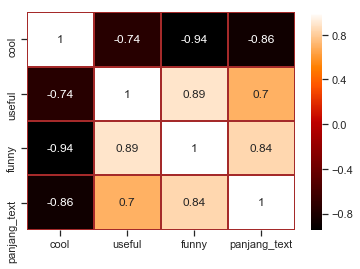

In [14]:
display(sns.heatmap(df_rata2.corr(),annot=True,cmap='gist_heat',linewidths=1,linecolor='brown'))
display(df_rata2.corr())

## Text Pre-Processing and Train Test Split ##

In [15]:
df[['text','panjang_text','stars']].head()

,text,panjang_text,stars
0,My wife took me here on my birthday for breakf...,889,5
1,I have no idea why some people give bad review...,1345,5
2,love the gyro plate. Rice is so good and I als...,76,4
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",419,5
4,General Manager Scott Petello is a good egg!!!...,469,5


In [16]:
df_5dan1 = df[(df['stars']==1)|(df['stars']==5)]

In [17]:
X = df_5dan1['text']
y = df_5dan1['stars']

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
CV = CountVectorizer()

In [20]:
X = CV.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Train Model ##

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
NB = MultinomialNB()

In [25]:
NB.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
prediksi = NB.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(classification_report(y_test,prediksi))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

   micro avg       0.93      0.93      0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [48]:
print(confusion_matrix(y_test,prediksi))

[[159  69]
 [ 22 976]]


## Coba Model Baru dengan Pipeline dan TfidfTransformer ##

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

In [50]:
from sklearn.pipeline import Pipeline

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
XY = df[(df['stars']==1)|(df['stars']==5)]
X1 = XY['text']
y1 = XY['stars']

In [43]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=101)

In [54]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer='word')),
                     ('tfidf',TfidfTransformer()),
                    ('classifier',RandomForestClassifier(n_estimators=100))
                    ])

In [55]:
pipeline.fit(X1_train,y1_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [56]:
prediksi1 = pipeline.predict(X1_test)

In [57]:
print(classification_report(prediksi1,y1_test))

              precision    recall  f1-score   support

           1       0.18      0.95      0.31        44
           5       1.00      0.84      0.91      1182

   micro avg       0.85      0.85      0.85      1226
   macro avg       0.59      0.90      0.61      1226
weighted avg       0.97      0.85      0.89      1226



In [58]:
print(confusion_matrix(prediksi1,y1_test))

[[ 42   2]
 [186 996]]
